#About Dataset
###Description
This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records. For more information about this dataset, https://smoosavi.org/datasets/us_accidents please visit here.

#🚀 PHASE 1: Project Initialization & Data Loading
###🎯 Objective:
Successfully mount Google Drive, load a portion of the dataset, and preview its structure to prepare for cleaning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visual style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# # Load data
# df = pd.read_csv("drive/MyDrive/US_Accidents.csv", low_memory=False)

In [2]:
file_path = 'drive/MyDrive/US_Accidents.csv'
chunk_size = 500_000

# Load first chunk
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
  df = chunk.copy()
  break

In [3]:
# Check shape, columns, datatypes, and missing values
# Basic structure
print("Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)

# Sample rows
print(df.head())

# Missing values
df.isnull().sum().sort_values(ascending=False).head(20)

Shape: (500000, 46)

Column Names:
 Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Data Types:
 ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng 

End_Lng                  500000
End_Lat                  500000
Precipitation(in)        448054
Wind_Chill(F)            437641
Wind_Speed(mph)           89040
Visibility(mi)            10539
Weather_Condition         10185
Humidity(%)                7915
Temperature(F)             7250
Pressure(in)               5739
Wind_Direction             4147
Weather_Timestamp          4115
Airport_Code                 60
Timezone                     58
Zipcode                      58
Nautical_Twilight            22
Civil_Twilight               22
City                         22
Astronomical_Twilight        22
Sunrise_Sunset               22
dtype: int64

#🔧 PHASE 2: Data Cleaning & Preparation
###🎯 Objective:
Handle missing values, drop irrelevant columns, convert data types, and prepare a clean, optimized dataset for EDA and modeling.

In [4]:
#1. Drop Columns with Too Much Missing Data
drop_cols = ['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)',
             'Airport_Code', 'Zipcode', 'Weather_Timestamp']
df.drop(columns=drop_cols, inplace=True)

In [5]:
#2.Handle Remaining Null Values

# Fill with median for numeric
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())
df['Pressure(in)'] = df['Pressure(in)'].fillna(df['Pressure(in)'].median())

df.fillna({
    'Temperature(F)': df['Temperature(F)'].median(),
    'Pressure(in)': df['Pressure(in)'].median(),
    'Humidity(%)': df['Humidity(%)'].median(),
    'Visibility(mi)': df['Visibility(mi)'].median(),
    'Wind_Speed(mph)': df['Wind_Speed(mph)'].median()
}, inplace=True)

# Drop few remaining missing rows
df.dropna(inplace=True)

In [6]:
#3.Convert Start_Time and End_Time to datetime
#This is critical for time-based EDA and feature engineering.

df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [7]:
# 4.Create New Time-Based Columns

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek

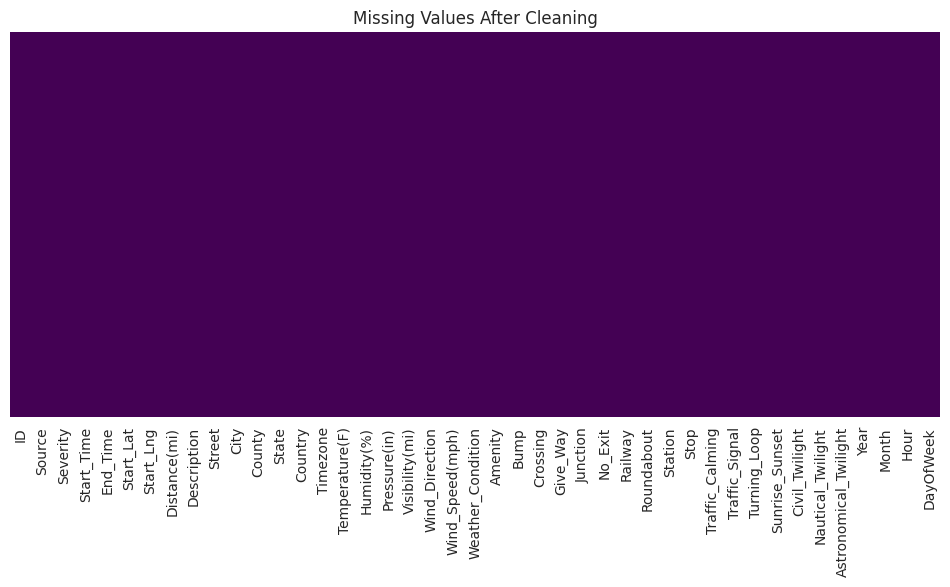

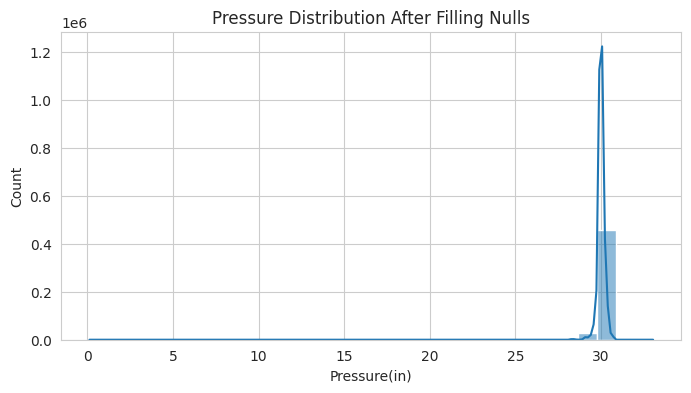

In [8]:
# 1. Missing Values Before vs After Cleaning (Optional)
# Before cleaning (if you saved original copy)
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values After Cleaning")
plt.show()

# 2. Histogram for Pressure(in) or Temperature(F) (Before and After Filling)
plt.figure(figsize=(8,4))
sns.histplot(df['Pressure(in)'], kde=True, bins=30)
plt.title('Pressure Distribution After Filling Nulls')
plt.show()

#📊 PHASE 3: Exploratory Data Analysis (EDA)
###🎯 Goal: Discover patterns, trends, and correlations in accidents across the US.

We'll break Phase 3 into 5 mini tasks.

###TASK 1: Basic Distribution & Frequency Analysis
####🎯 Objective:
Understand where and how often accidents occur.

📌 Actions:

1.Top 10 states with most accidents

2.Top 10 cities with most accidents

3.Severity distribution (i.e., how serious most accidents are)

📊 Plots to Create:

✅ Bar Plot → Top 10 States by accident count

✅ Bar Plot → Top 10 Cities

✅ Pie/Bar Plot → Severity value count

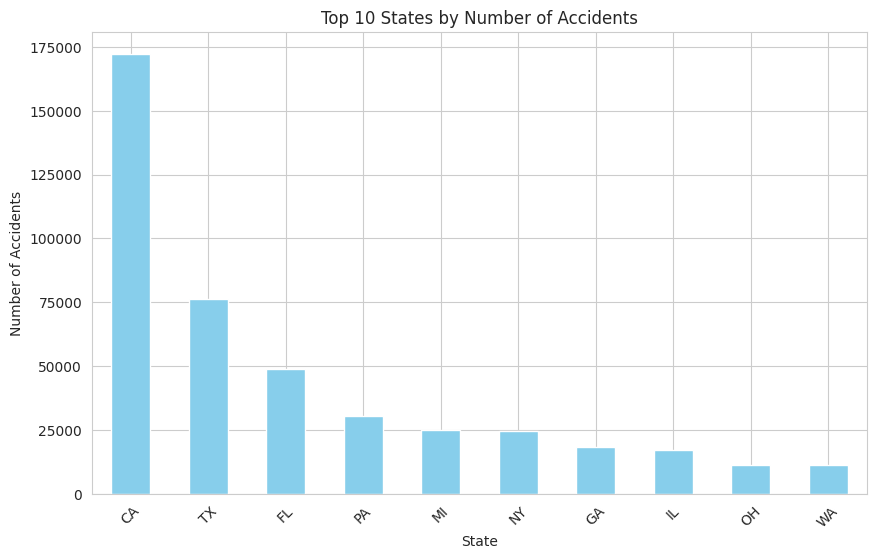

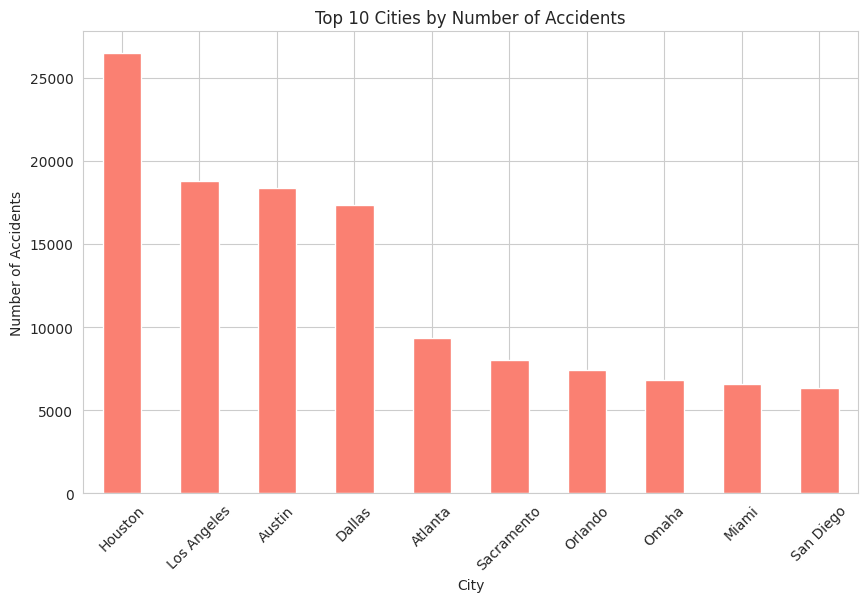

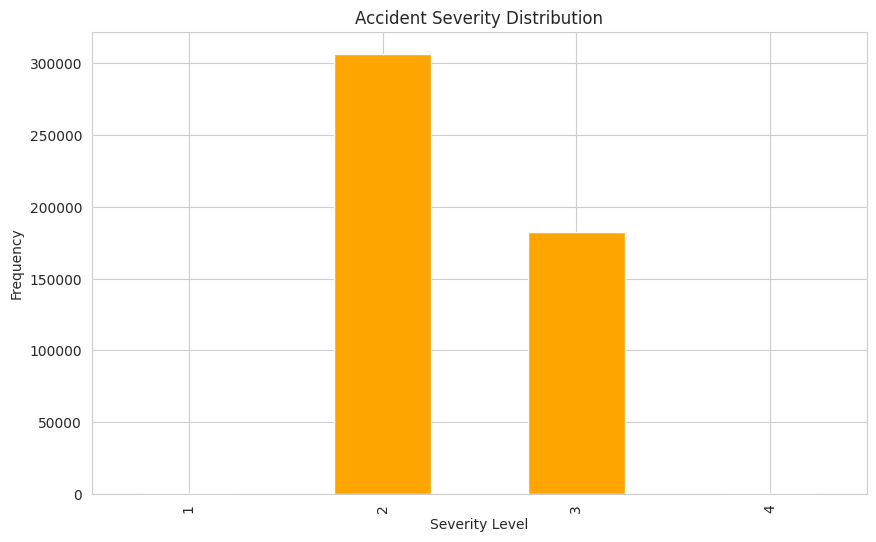

In [9]:
# 1. Top 10 States with Most Accidents

df['State'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States by Number of Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 2. Top 10 Cities
df['City'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Cities by Number of Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

#  3. Severity Distribution(i.e., how serious most accidents are)
df['Severity'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.show()

###TASK 2: Time-Based Trends
####🎯 Objective:
Find when accidents are most frequent (time of day, month, year, weekday)

📌 Actions:

1.Accidents by hour

2.Accidents by weekday

3.Accidents by month

4.Accidents over the years

📊 Plots to Create:

✅ Histogram/Bar Plot → Hourly accident frequency

✅ Bar Plot → Weekday trend

✅ Line Plot → Monthly trend

✅ Line Plot → Yearly trend

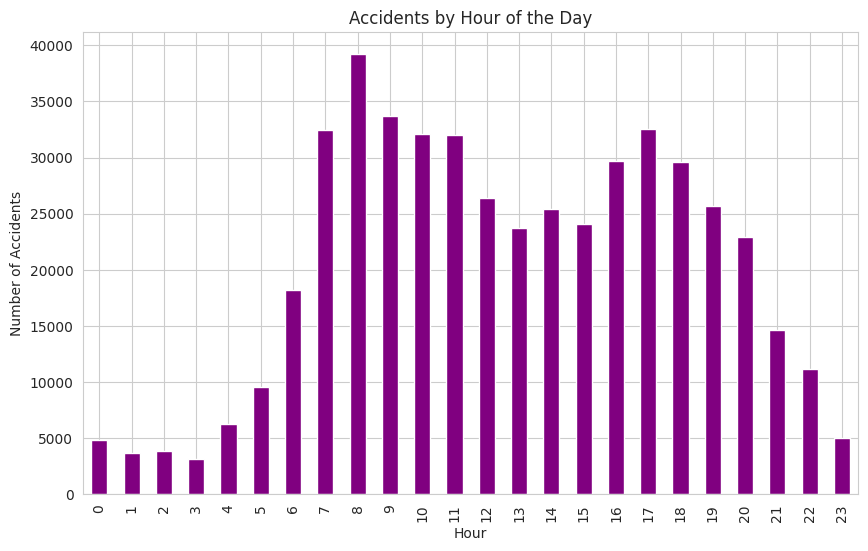

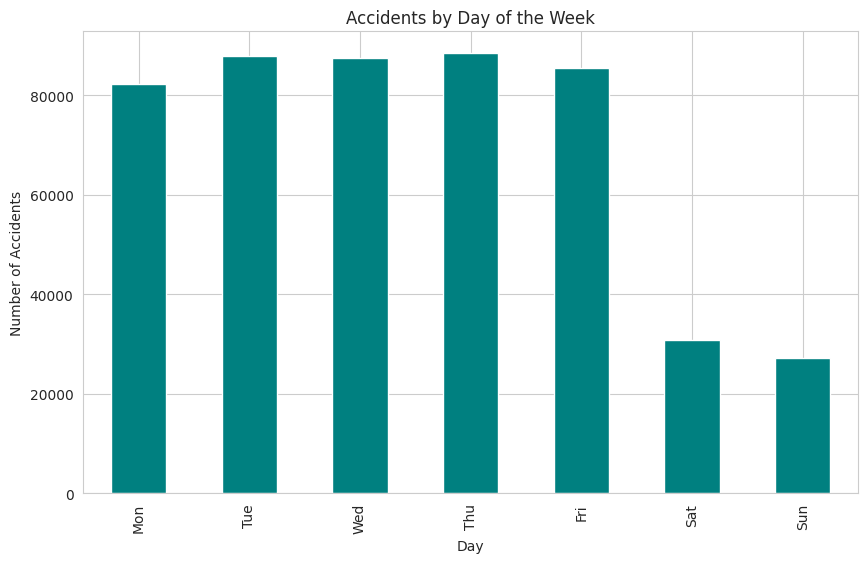

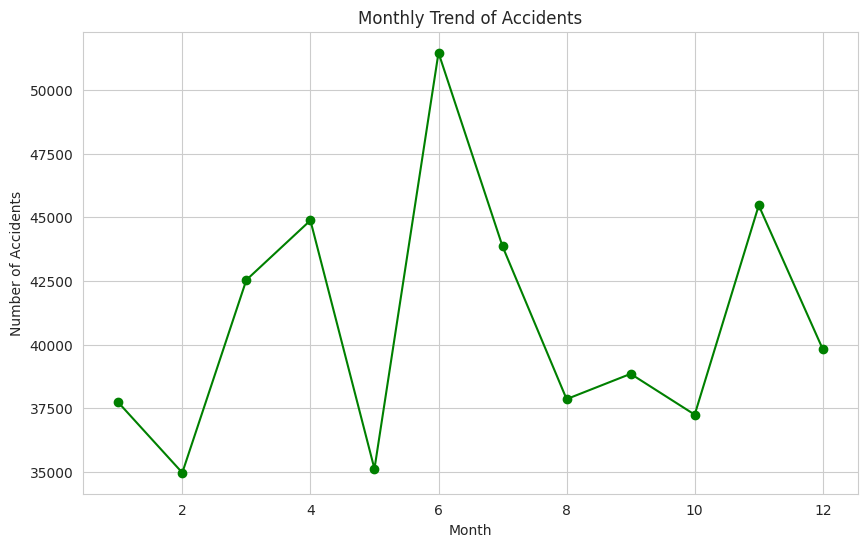

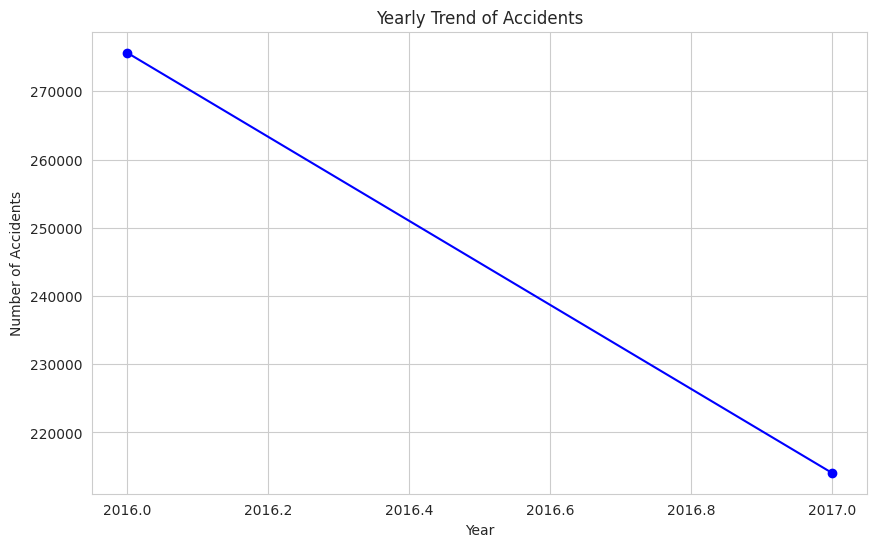

In [10]:
# 4. Accidents by Hour
df['Hour'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

# 5. Accidents by Day of the Week
day_map = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['DayOfWeek'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day')
plt.xticks(ticks=range(7), labels=day_map)
plt.ylabel('Number of Accidents')
plt.show()

# 6. Accidents by Month
df['Month'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Monthly Trend of Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# 7. Accidents by Year
df['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='blue')
plt.title('Yearly Trend of Accidents')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

###TASK 3: Weather Conditions
####🎯 Objective:
Explore which weather conditions are linked to more accidents

📌 Actions:

1.Top 10 most common weather conditions

2.Compare accident severity under different weather

📊 Plots to Create:

✅ Bar Plot → Weather condition frequency

✅ Box Plot or Grouped Bar → Severity vs Weather

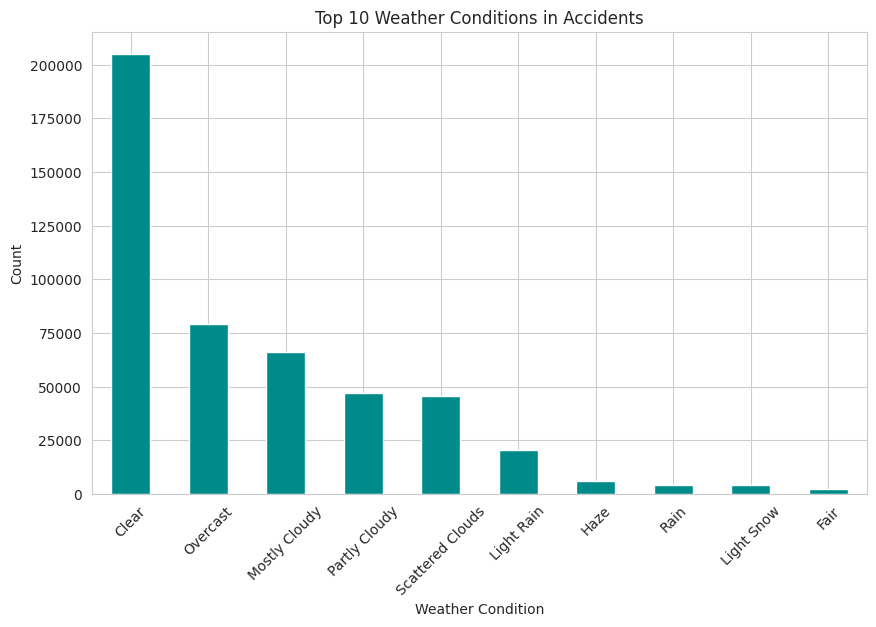

/tmp/ipython-input-11-4195358358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_weather_top, x='Weather_Condition', y='Severity', palette='Set3')


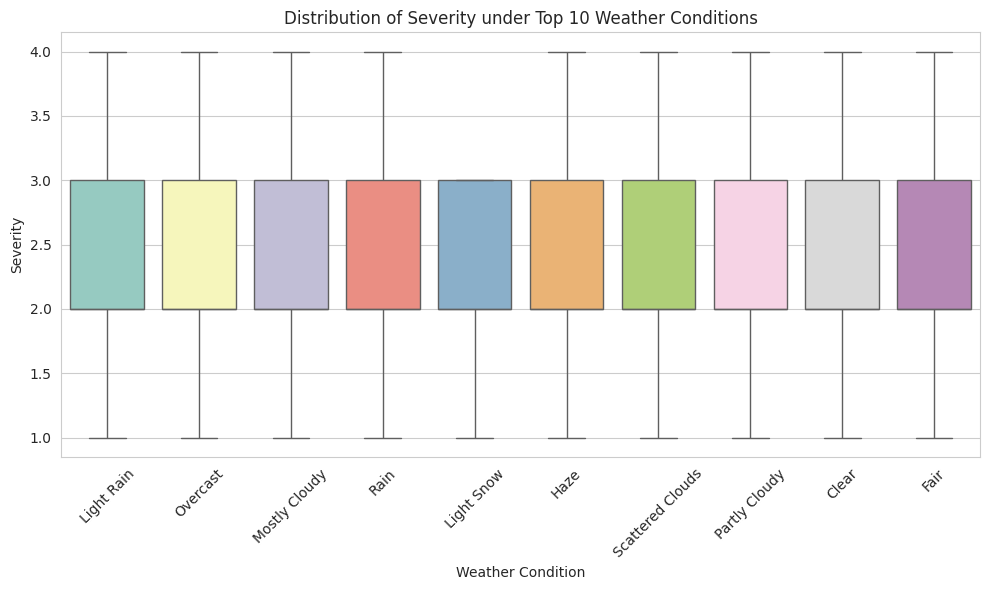

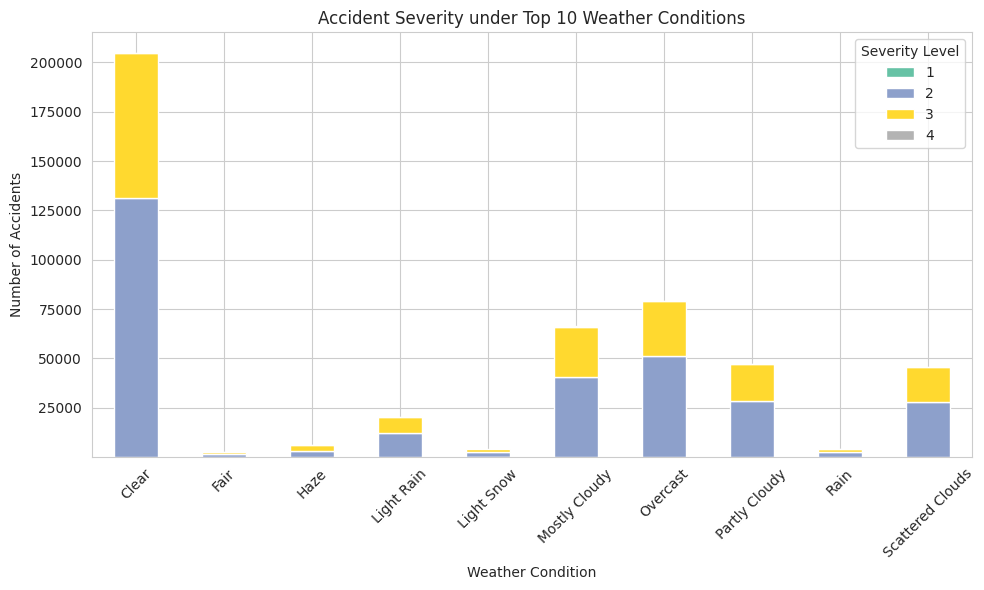

In [11]:
# 8. Top 10 Weather Conditions
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', color='darkcyan')
plt.title('Top 10 Weather Conditions in Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2.Compare accident severity under different weather
# option 1....> Box Plot (If you want distribution instead of count)
# Filter for top weather only
# Get top 10 weather conditions by count
top_weather = df['Weather_Condition'].value_counts().head(10).index
df_weather_top = df[df['Weather_Condition'].isin(top_weather)] # Whether each element in the DataFrame is contained in values.
                                                               # If values is a Series, that's the index. If
                                                               # values is a dict, the keys must be the column names,
                                                               # which must match. If values is a DataFrame,
                                                               # then both the index and column labels must match.

# Box plot of severity per weather condition
sns.boxplot(data=df_weather_top, x='Weather_Condition', y='Severity', palette='Set3')
plt.title('Distribution of Severity under Top 10 Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# option 2....> Grouped Bar Plot (Cleaner & easier to read)
# Group by Weather_Condition and Severity
weather_severity = df_weather_top.groupby(['Weather_Condition', 'Severity']).size().unstack().fillna(0)

# Plot
weather_severity.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Accident Severity under Top 10 Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity Level')
plt.tight_layout()
plt.show()



###TASK 4: Traffic Features Impact
####🎯 Objective:
Examine whether traffic features contribute to accidents

📌 Actions:

1.Count accidents with/without signals, junctions, etc.

2.Plot proportions

📊 Plots to Create:

✅ Bar Plot → Frequency of Traffic_Signal, Junction, etc.

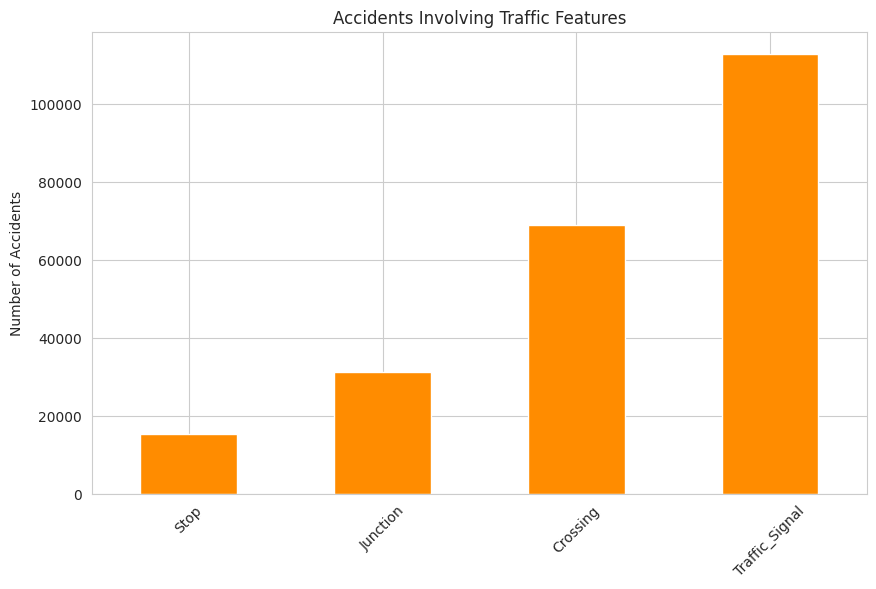

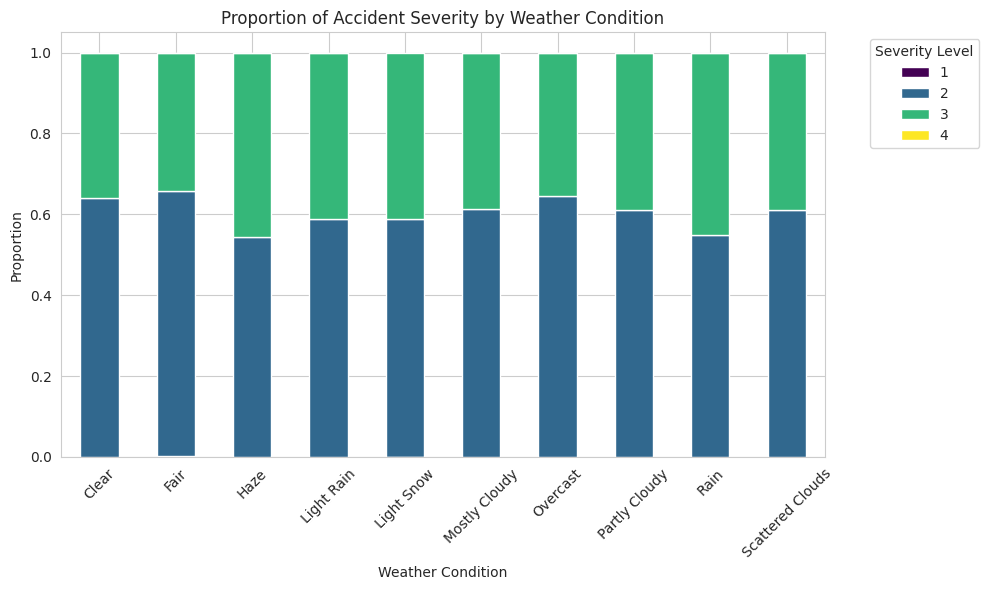

In [12]:
# 9. Accidents Involving Traffic Features
traffic_cols = ['Traffic_Signal', 'Junction', 'Stop', 'Crossing']
df[traffic_cols].sum().sort_values().plot(kind='bar', color='darkorange')
plt.title('Accidents Involving Traffic Features')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# 10.plot Proportions
# This is even better for comparison than raw counts. Here's the full code to plot proportions of severity per weather condition:

# Group by weather & severity and normalize to get proportions
weather_severity_prop = (
    df_weather_top.groupby(['Weather_Condition', 'Severity'])
    .size()
    .unstack(fill_value=0)
)

# Convert to proportions (row-wise %)
weather_severity_prop_pct = weather_severity_prop.div(weather_severity_prop.sum(axis=1), axis=0)

# Plot
weather_severity_prop_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportion of Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Severity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### TASK 5: Environmental Factors Impact on Accidents
We want to explore how weather-related numeric variables influence accidents.

####🎯 Objective:
Analyze distribution and relationship of these environmental variables with accident severity.

📌 Actions:

1.Selected environmental factors:

Temperature(F)

Humidity(%)

Pressure(in)

Visibility(mi)

Wind_Speed(mph)

Precipitation(in)

2.Plotted box plots comparing each environmental variable against Severity

→ To visualize how each weather factor changes with severity level.

3.Generated distribution plots

→ To inspect the spread and outliers of environmental variables.

4.Created correlation heatmap

→ To evaluate numeric relationships between environmental factors and Severity.



📊 Plots to Create:

1.Boxplots (for each factor vs. severity)

2.Distribution Histograms + KDE (individual plots for all environmental features)

3.Correlation Heatmap


/tmp/ipython-input-13-821997585.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Severity', y=col, palette='Set2')


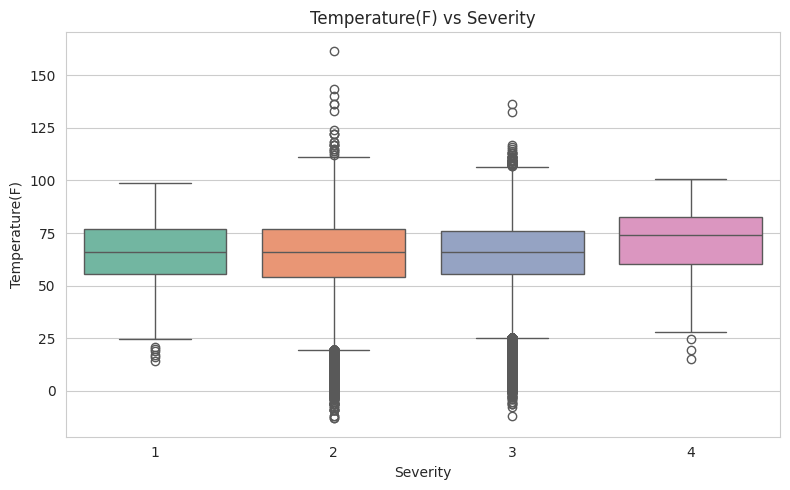

/tmp/ipython-input-13-821997585.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Severity', y=col, palette='Set2')


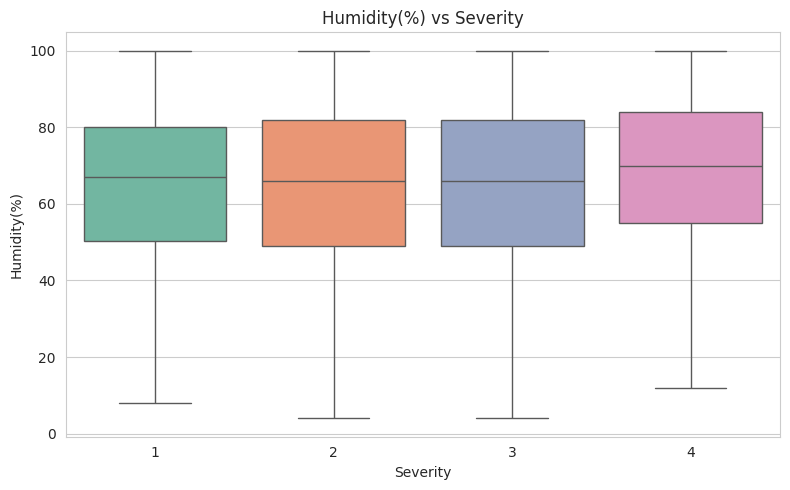

/tmp/ipython-input-13-821997585.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Severity', y=col, palette='Set2')


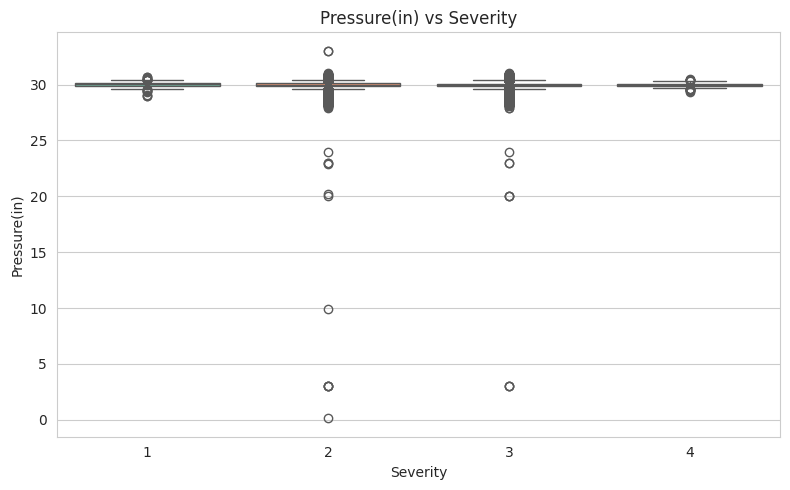

/tmp/ipython-input-13-821997585.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Severity', y=col, palette='Set2')


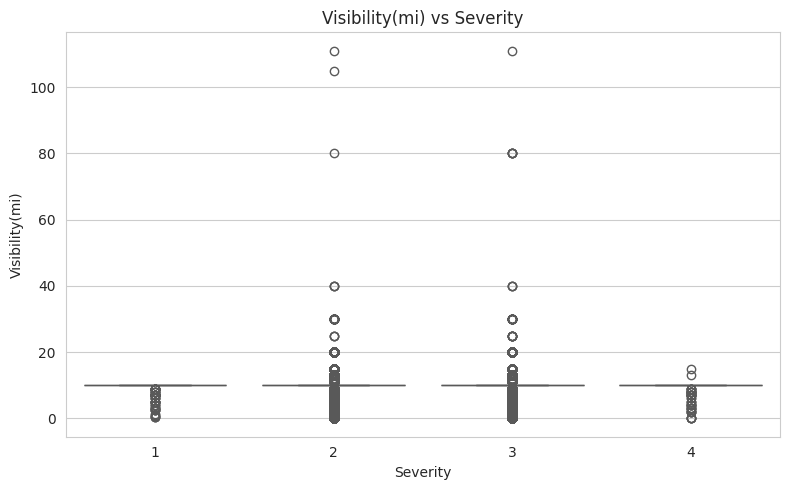

/tmp/ipython-input-13-821997585.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Severity', y=col, palette='Set2')


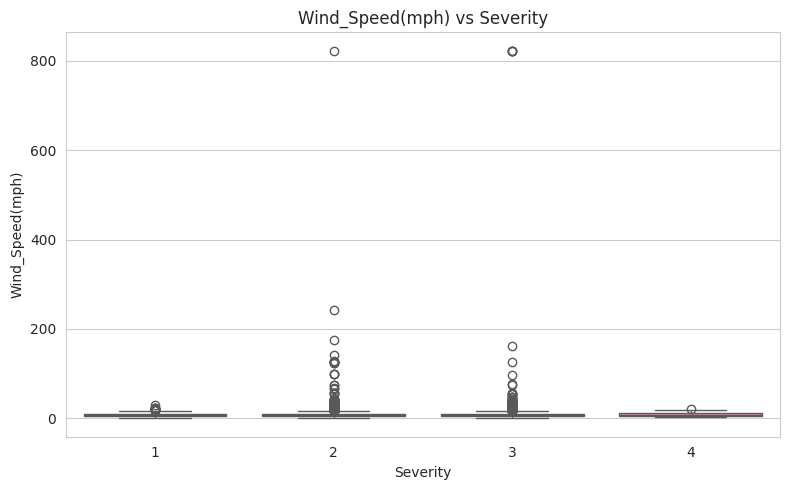

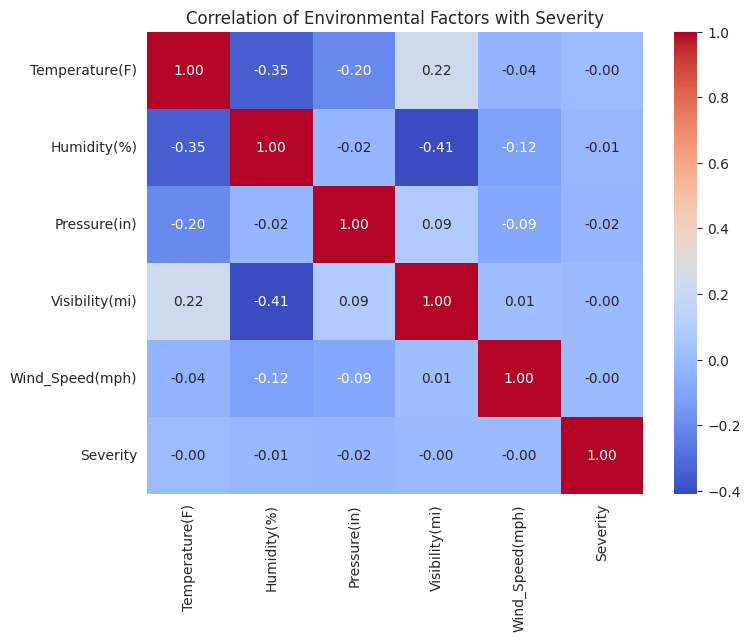

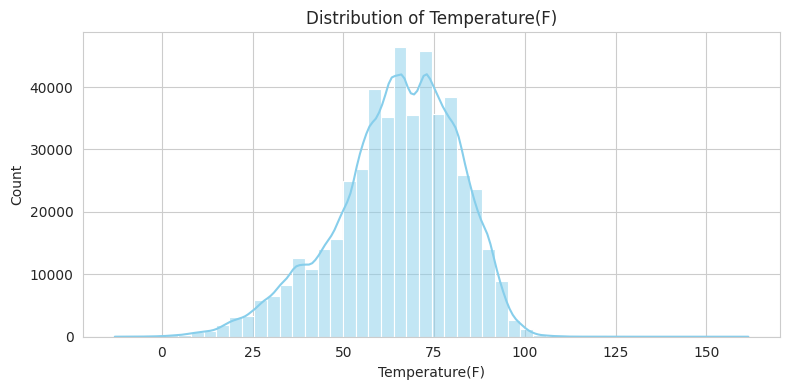

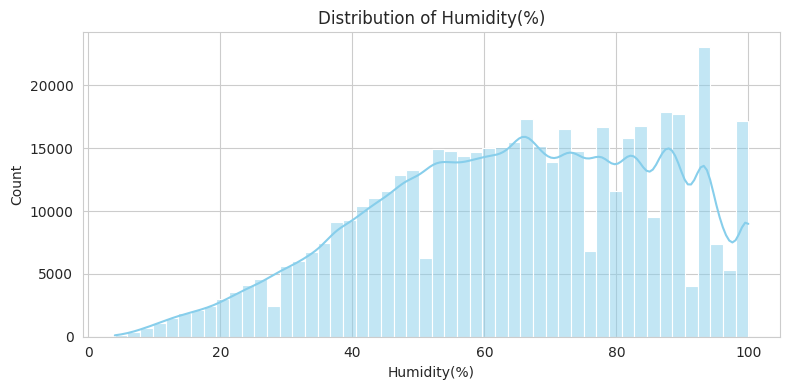

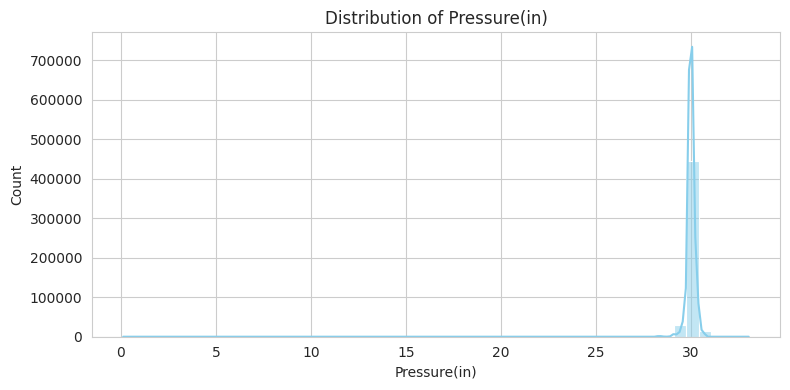

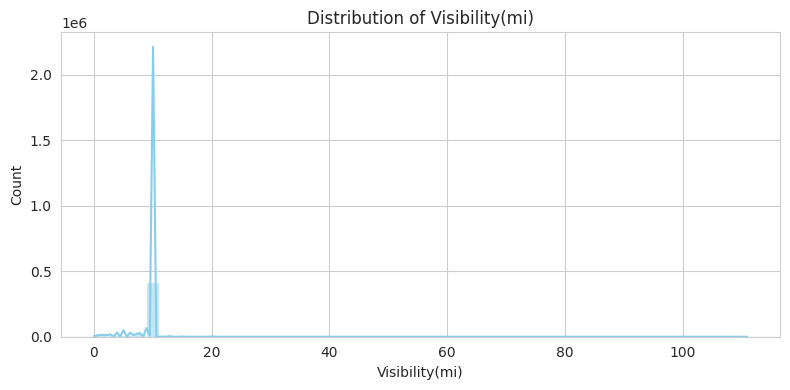

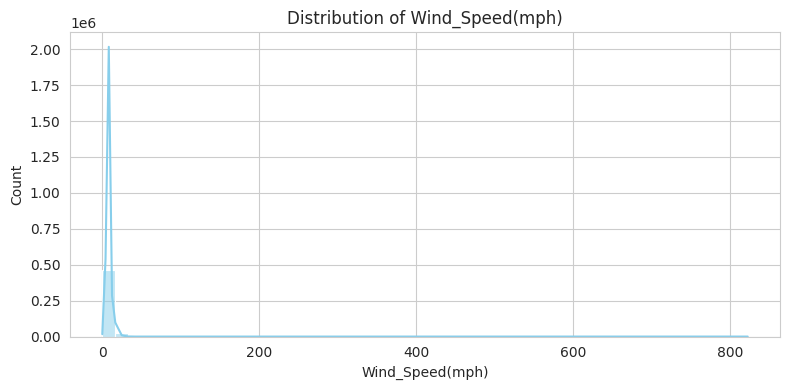

In [13]:
# 11  1. Boxplots: Environmental Variable vs Severity
env_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)',
            'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Clean up potential extra characters from column names
env_cols = [col.strip() for col in env_cols]

# Filter env_cols to only include columns present in df
env_cols_present = [col for col in env_cols if col in df.columns]


for col in env_cols_present:
    # Check if the column exists in the dataframe before plotting
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x='Severity', y=col, palette='Set2')
        plt.title(f'{col} vs Severity')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in the dataframe. Skipping plot.")


# 12  2. Correlation Heatmap of Numeric Environmental Factors

# Select only relevant numeric features
# Filter env_cols to only include columns present in df

env_data = df[env_cols_present + ['Severity']].copy()

# Drop rows with missing values
env_data_clean = env_data.dropna()

# Correlation matrix
corr = env_data_clean.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Environmental Factors with Severity")
plt.show()

#  12 3. Distribution Plots of Key Variables
for col in env_cols_present:  # Use the filtered list
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

#🌍 Phase 4: Geo-Spatial Mapping & Spatial Analysis
🎯 Goal:

Uncover where accidents occur most frequently and analyze spatial patterns using maps.

###Task 1: Choropleth Map – Accidents by State
📍 Purpose: Visualize accident distribution across U.S. states.

🛠️ Action:

1.Group data by State, count accidents

2.Plot using Plotly or GeoPandas (Plotly preferred for Colab)

In [14]:
# Accidents by state
state_accidents = df['State'].value_counts().reset_index()
state_accidents.columns = ['State', 'Accident_Count']

# Choropleth
fig = px.choropleth(
    state_accidents,
    locations='State',
    locationmode='USA-states',
    color='Accident_Count',
    color_continuous_scale='YlOrRd',
    scope='usa',
    title='Accidents by State (USA)'
)
fig.show()

###Task 2: Heatmap – Accident Density by Latitude & Longitude
📍 Purpose: Visualize high-density accident zones.

In [15]:
import folium
from folium.plugins import HeatMap

# Filter data for plotting
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(100000)  # Reduce size for performance

# Create base map
map_heat = folium.Map(location=[39.50, -98.35], zoom_start=4)  # USA center

# Add heatmap
HeatMap(data=sample_df.values, radius=8, max_zoom=13).add_to(map_heat)

# Show map (works in Colab with HTML export)
map_heat

###Task 3: City-Level Accident Bar Chart
📍 Purpose: Identify cities with highest accident counts.

/tmp/ipython-input-16-4127447586.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




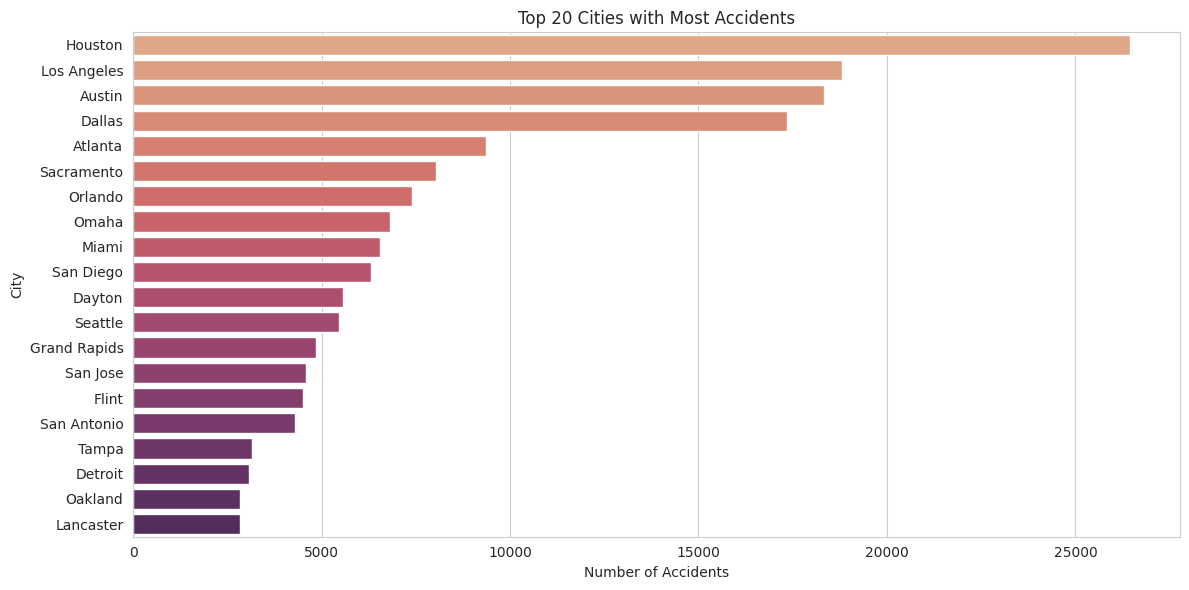

In [16]:
top_cities = df['City'].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='flare')
plt.title('Top 20 Cities with Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.tight_layout()
plt.show()

#📅 Phase 5: Time-Series & Trend Analysis
###🎯 Goal:
1.Analyze how accident frequency changes over time (years, months, weekdays, hours). This reveals:

2.When most accidents happen

3.Seasonal trends

4.Weekday vs weekend patterns

5.Peak accident hours

###Task 1: Extract Time Features
From the Start_Time column, extract:

1.Year

2.Month

3.Day of week

4.Hour

In [17]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day_of_Week'] = df['Start_Time'].dt.day_name()
df['Hour'] = df['Start_Time'].dt.hour

###Task 2: Yearly Trend of Accidents

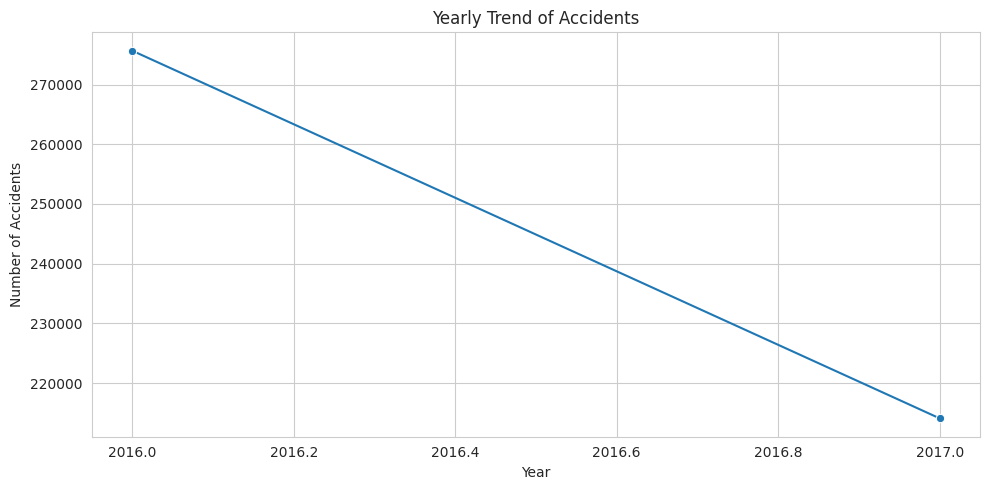

In [18]:
yearly_accidents = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker='o')
plt.title("Yearly Trend of Accidents")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()

###Task 3: Monthly Distribution of Accidents

/tmp/ipython-input-19-3920890175.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




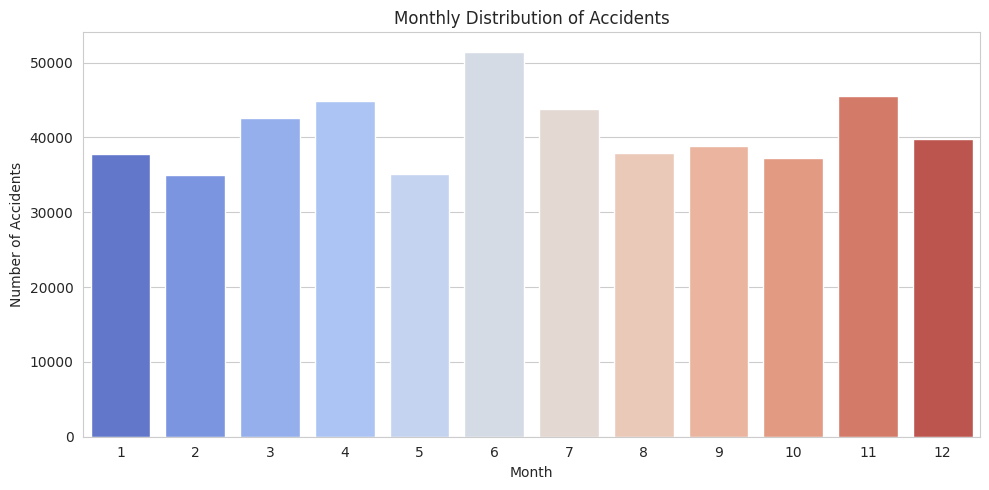

In [19]:
monthly = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly.index, y=monthly.values, palette='coolwarm')
plt.title("Monthly Distribution of Accidents")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

 ### Task 4: Day of the Week Analysis

/tmp/ipython-input-20-30771015.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




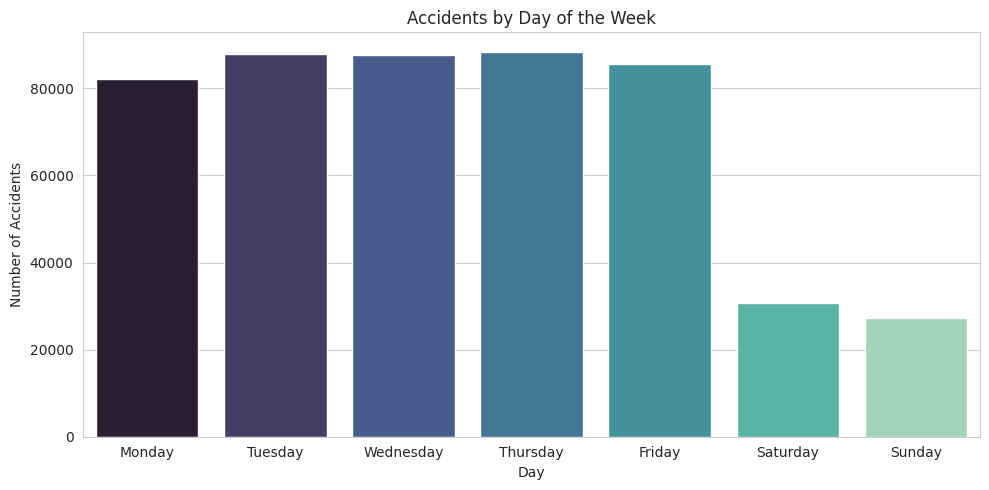

In [20]:
dow = df['Day_of_Week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 5))
sns.barplot(x=dow.index, y=dow.values, palette='mako')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

### Task 5: Hourly Pattern of Accidents

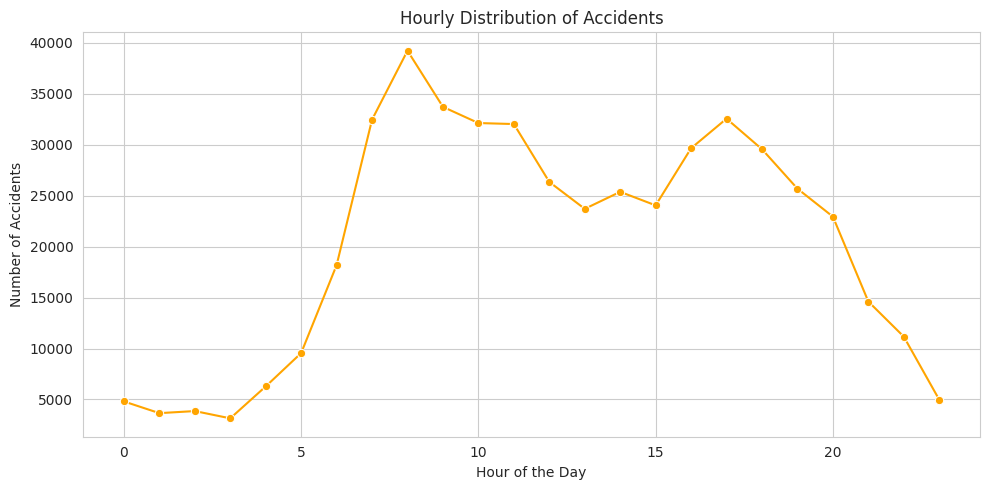

In [21]:
hourly = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly.index, y=hourly.values, marker='o', color='orange')
plt.title("Hourly Distribution of Accidents")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()

#🤖 Phase 6: Machine Learning – Severity Prediction
###🎯 Objective:
Build a machine learning model to predict the severity level (1-4) of an accident based on features like time, location, weather, and road conditions.

###Task 1: Define the Problem & Target
Target column: Severity (values: 1, 2, 3, 4)

Type of problem: Multi-class classification



###Task 2: Feature Selection & Dropping
Choose important features and drop irrelevant or high-missing columns.

In [22]:
features_to_keep = [
    'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
    'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
    'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition', 'City',
    'State', 'Sunrise_Sunset'
]

df_ml = df[features_to_keep].copy()

###Task 3: Data Preprocessing
1.Convert time columns

2.Handle missing values

3.Encode categorical variables

In [23]:
# Drop rows with missing values (or use imputation)
df_ml.dropna(inplace=True)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

label_cols = ['Weather_Condition', 'City', 'State', 'Sunrise_Sunset']
le = LabelEncoder()
for col in label_cols:
    df_ml[col] = le.fit_transform(df_ml[col])

###Task 4: Feature Engineering (Optional but Effective)
Add new features:

In [24]:
df_ml['Start_Hour'] = pd.to_datetime(df_ml['Start_Time']).dt.hour
df_ml['Start_Day'] = pd.to_datetime(df_ml['Start_Time']).dt.dayofweek
df_ml['Duration(min)'] = (pd.to_datetime(df_ml['End_Time']) - pd.to_datetime(df_ml['Start_Time'])).dt.total_seconds() / 60
df_ml.drop(['Start_Time', 'End_Time'], axis=1, inplace=True)

###Task 5: Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('Severity', axis=1)
y = df_ml['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Task 6: Train Classifier (Random Forest)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        78
           2       0.88      0.91      0.89     61512
           3       0.83      0.79      0.81     36313
           4       0.43      0.06      0.10        51

    accuracy                           0.86     97954
   macro avg       0.53      0.44      0.45     97954
weighted avg       0.86      0.86      0.86     97954



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



###Task 7: Evaluate Model
1.Confusion Matrix

2.Classification Report

3.Accuracy

4.Feature Importance

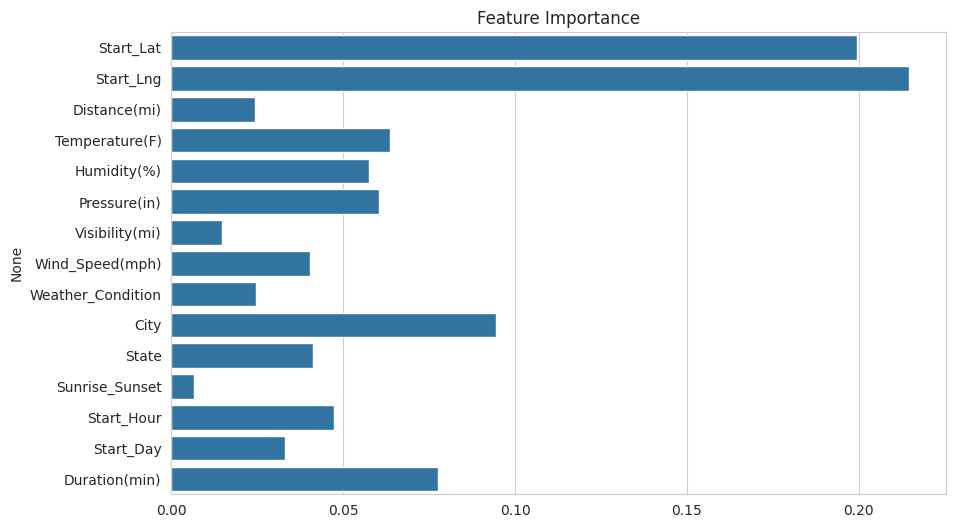

In [27]:
# Feature importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

#PHASE 7 :Final Dashboard & Reporting
###TASK 1:
Full Model Comparison (Classification Models for Severity Prediction)
###TASK 2:
Final Deep Analysis (Advanced & Extended Version)



We'll compare multiple classifiers to see which gives the best performance:

📌 Models to Compare:

1.Logistic Regression

2.Decision Tree Classifier

3.Random Forest Classifier (Already Done)

4.XGBoost

5.Gradient Boosting

6.K-Nearest Neighbors (KNN)

7.Support Vector Machine (SVM)

🧪 Metrics to Evaluate:

1.Accuracy

2.Precision, Recall, F1-Score

3.Confusion Matrix

4.ROC-AUC Score (if binary reduced or for each class)



###📊 Task 1: Extended Model Comparison
Compared multiple ML models for severity prediction:

1.Logistic Regression

2.Random Forest

3.XGBoost

4.Decision Tree

5.SVM

6.K-Nearest Neighbors (KNN)

Evaluated using metrics:

Accuracy, Precision, Recall, F1-Score

Confusion Matrix

Selected the best-performing model and addressed convergence issues where needed.
###📋 Feature Selection (useful and available):

| Column                                        | Type             | Purpose           |
| --------------------------------------------- | ---------------- | ----------------- |
| `Severity` (target)                           | Categorical      | Class: 1–4        |
| `Temperature(F)`                              | Numerical        | Weather           |
| `Humidity(%)`                                 | Numerical        | Weather           |
| `Pressure(in)`                                | Numerical        | Weather           |
| `Visibility(mi)`                              | Numerical        | Environment       |
| `Wind_Speed(mph)`                             | Numerical        | Environment       |
| `Precipitation(in)`                           | Numerical        | Weather           |
| `Weather_Condition`                           | Categorical      | Weather           |
| `State`                                       | Categorical      | Geo               |
| `City` (optional)                             | High-cardinality | Can skip or group |
| `Distance(mi)`                                | Numerical        | Event context     |
| `Amenity`, `Traffic_Signal`, `Crossing`, etc. | Boolean          | Road context      |

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

# # Load Data
# df = pd.read_csv("drive/MyDrive/US_Accidents.csv")
file_path = 'drive/MyDrive/US_Accidents.csv'
chunk_size = 2000_000

# Load first chunk
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
  df = chunk.copy()
  break
# ----------------------------------
# 1. Basic Preprocessing
# ----------------------------------
df = df[['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
         'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'State',
         'Distance(mi)', 'Traffic_Signal', 'Crossing', 'Amenity']]
df.dropna(inplace=True)

# ----------------------------------
# 2. Encoding Categorical Features
# ----------------------------------
le_weather = LabelEncoder()
df['Weather_Condition'] = le_weather.fit_transform(df['Weather_Condition'])

le_state = LabelEncoder()
df['State'] = le_state.fit_transform(df['State'])

# ----------------------------------
# 3. Feature & Target Selection
# ----------------------------------
X = df.drop('Severity', axis=1)
y = df['Severity']

# Optional: convert to binary (comment this if you want multiclass)
# y = y.apply(lambda x: 0 if x in [1, 2] else 1)

# ----------------------------------
# 4. Train-Test Split
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------
# 5. Scaling
# ----------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------
# 6. Model Setup
# ----------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=3),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, max_depth=3),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
}

# ----------------------------------
# 7. Training & Evaluation
# ----------------------------------
results = []

for name, model in models.items():
    print(f"\n🔹 Training {name}")

    if name in ["KNN", "SVM", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1 Score': round(f1, 4)
    })

    print(classification_report(y_test, y_pred))

# ----------------------------------
# 8. Summary DataFrame + Plot
# ----------------------------------
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print("\n✅ Model Comparison Summary:")
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



🔹 Training Logistic Regression
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7268
           2       0.67      0.97      0.79    190301
           3       0.52      0.09      0.16     91147
           4       0.15      0.01      0.02      2107

    accuracy                           0.66    290823
   macro avg       0.33      0.27      0.24    290823
weighted avg       0.60      0.66      0.57    290823


🔹 Training Decision Tree
              precision    recall  f1-score   support

           1       0.23      0.28      0.25      7268
           2       0.75      0.76      0.75    190301
           3       0.51      0.49      0.50     91147
           4       0.20      0.23      0.21      2107

    accuracy                           0.66    290823
   macro avg       0.42      0.44      0.43    290823
weighted avg       0.66      0.66      0.66    290823


🔹 Training Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.00      0.00      0.00      7268
           2       0.66      1.00      0.79    190301
           3       0.57      0.01      0.01     91147
           4       0.00      0.00      0.00      2107

    accuracy                           0.66    290823
   macro avg       0.31      0.25      0.20    290823
weighted avg       0.61      0.66      0.52    290823


🔹 Training KNN


###Task 2.Final Deep Analysis — US Accidents Dataset (2016–2023)
Each section below includes:

📍 Location-Based Visualizations (Choropleth, County-wise, Heatmaps)

🕒 Time-Based Trends (Hourly, Weekly)

🌦️ Weather Condition Impact

🚗 Distance & Duration distributions

🚥 Road Infrastructure Effects

🔦 Day vs. Night Accidents

🧭 Visibility & Wind Condition Binning

📌 Top Dangerous Cities

📈 Multivariate Correlation (Heatmap)

🌍 Geo Scatter Map
####Explored and visualized the dataset from all possible angles:

1.Location-based: State & City accident hotspots using bar charts and choropleth maps.

2.Time-based: Hourly, weekly accident trends using line plots and heatmaps.

3.Weather-based: Weather conditions' impact on severity with box plots & group bars.

4.Distance/Duration: Distribution analysis via histograms and scatter plots.

5.Road Features: Crossings, junctions, traffic signal influence via pie & stacked charts.

6.Light Conditions: Day vs. Night accident comparison using pie/grouped bars.

7.Visibility & Wind Impact: Severity change in poor conditions (binned visual analysis).

8.Top Dangerous Cities: City-wise accident density with bar plots.

9.Multivariate Correlation: Heatmap showing feature interdependencies.

10.Geospatial Mapping: Heatmaps and scatter maps for accident locations.


/tmp/ipython-input-1-3898939392.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=county_counts.index, x=county_counts.values, palette="viridis")


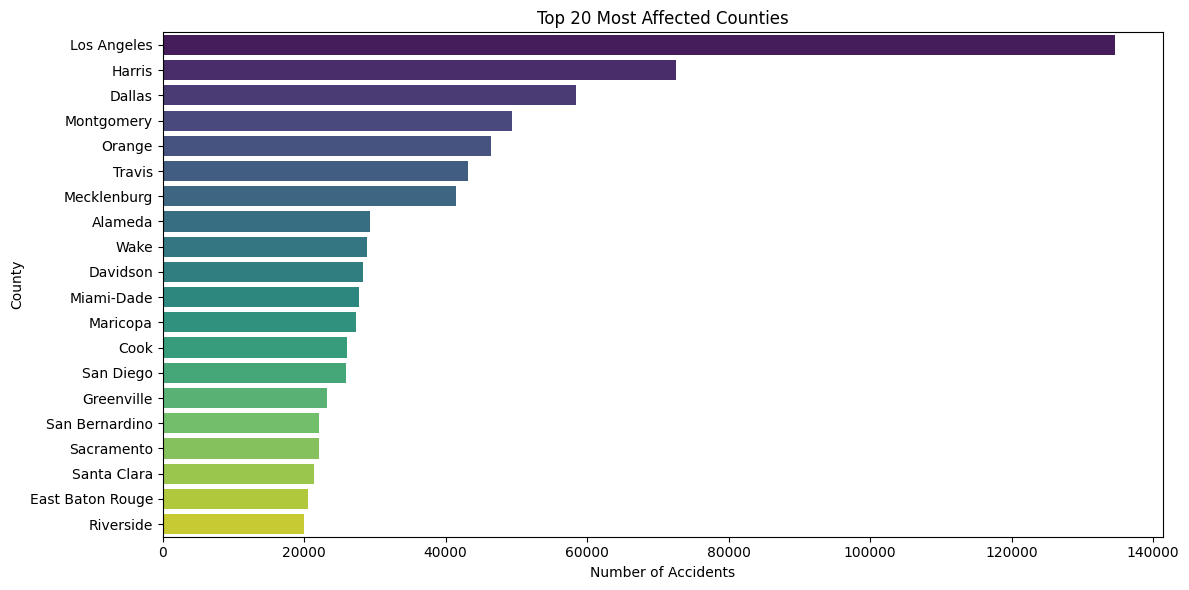

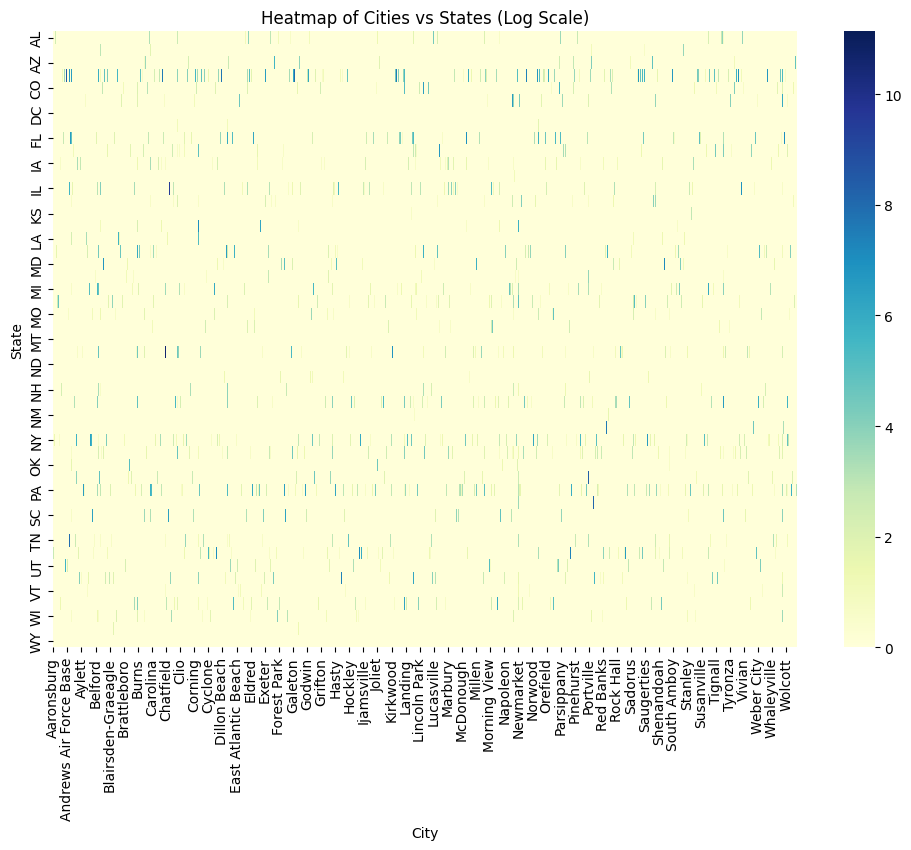

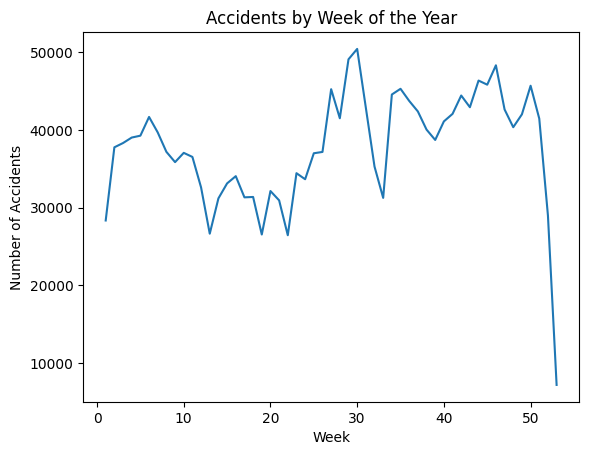

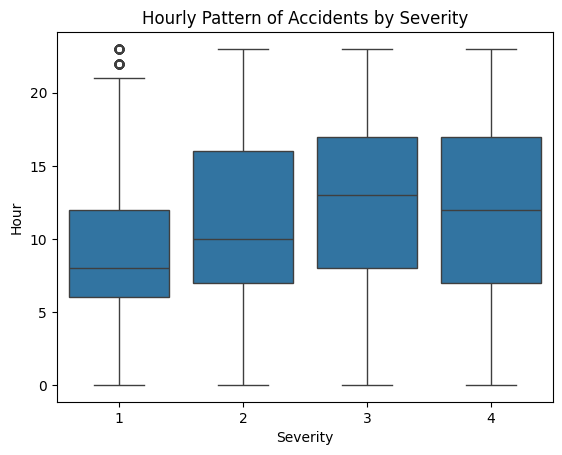

/tmp/ipython-input-1-3898939392.py:69: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




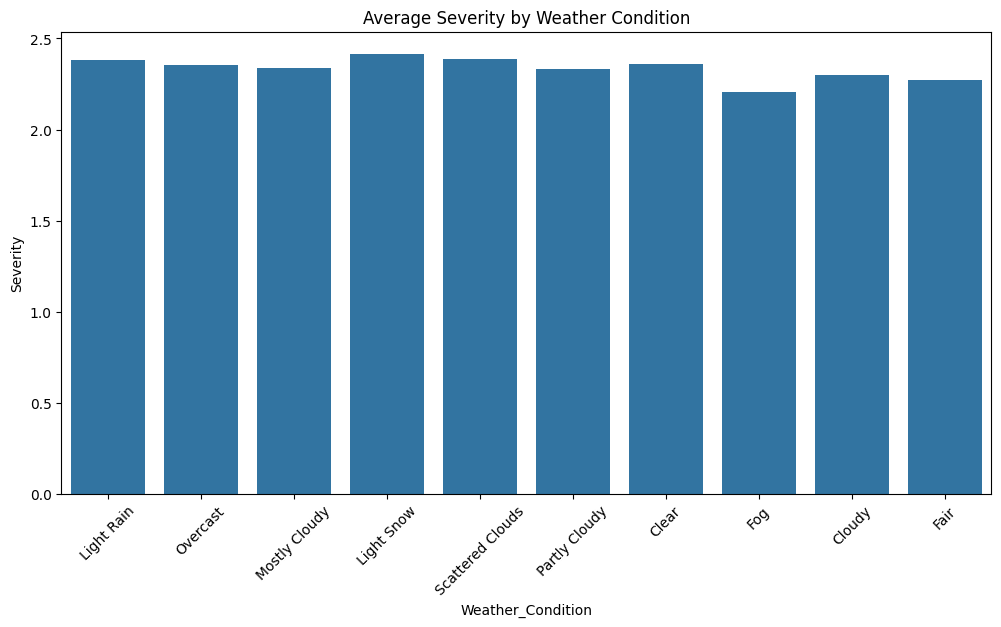

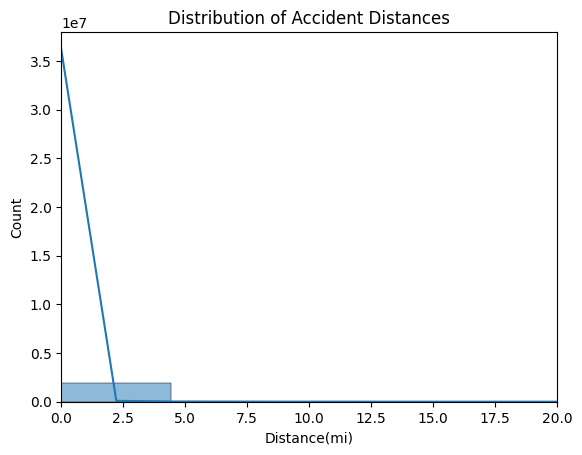

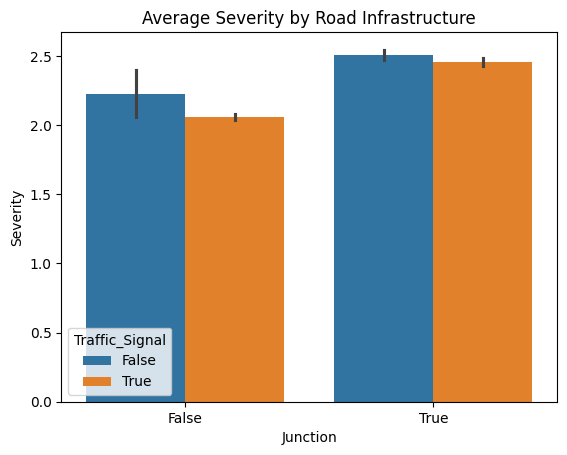

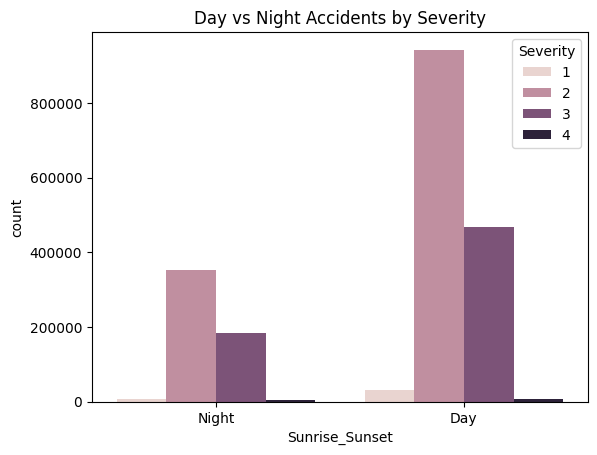

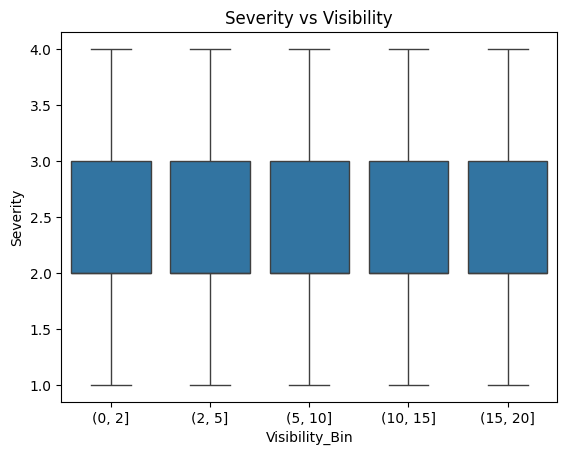

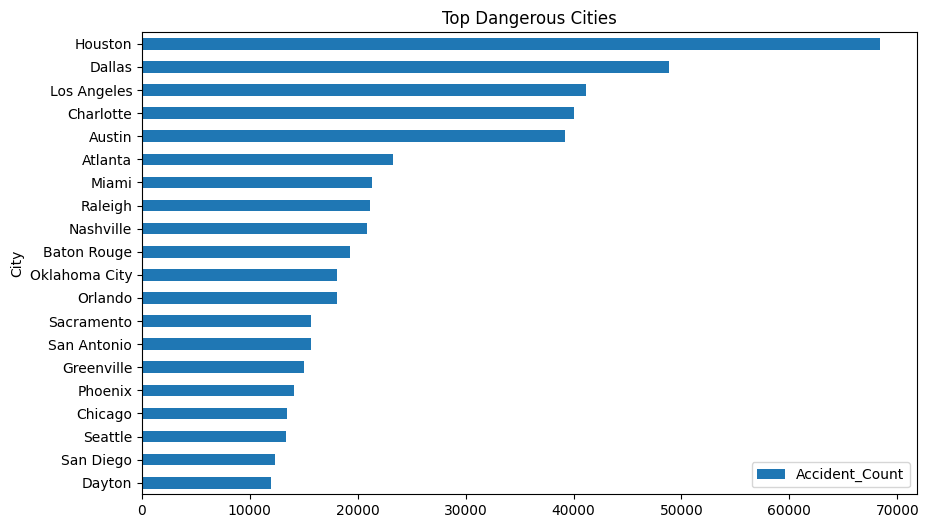

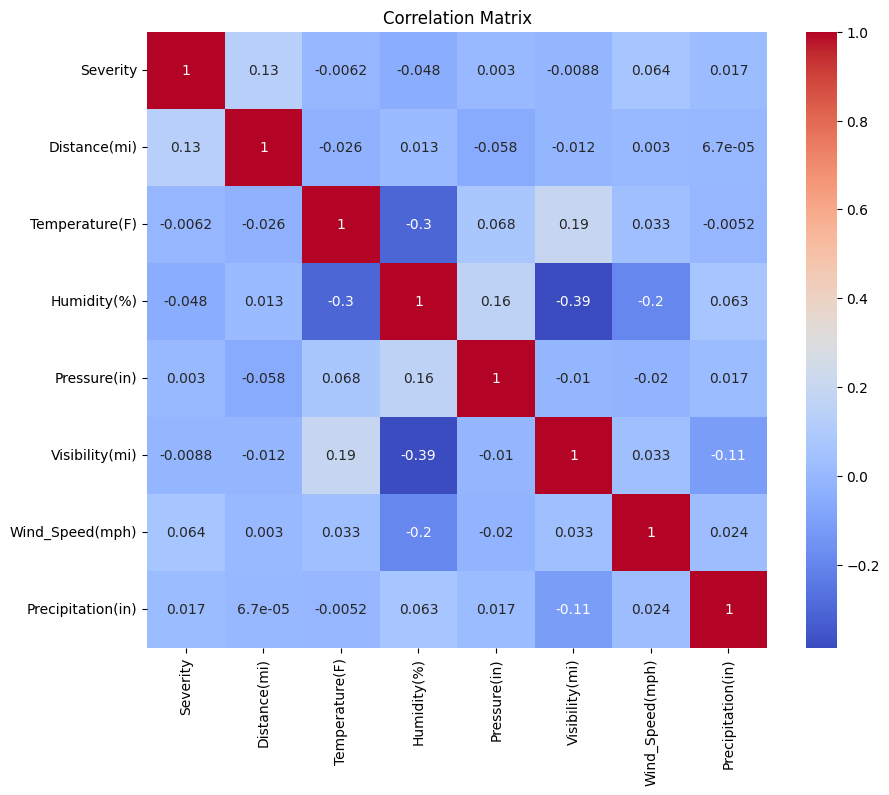

In [1]:
# US Accidents Dataset - Final Deep Analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# # Load the dataset
# df = pd.read_csv("/content/drive/MyDrive/US_Accidents.csv")
file_path = 'drive/MyDrive/US_Accidents.csv'
chunk_size = 2000_000

# Load first chunk
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
  df = chunk.copy()
  break
# -----------------------------####----------------------------------#
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

# ---------- A. Location-Based Analysis ----------

# 1. Top 20 Most Affected Counties
county_counts = df['County'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(y=county_counts.index, x=county_counts.values, palette="viridis")
plt.title("Top 20 Most Affected Counties")
plt.xlabel("Number of Accidents")
plt.ylabel("County")
plt.tight_layout()
plt.show()

# 2. Choropleth Map by State
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Accident Count']
fig = px.choropleth(state_counts, locations='State', locationmode='USA-states',
                    color='Accident Count', scope="usa", color_continuous_scale="Oranges")
fig.update_layout(title_text='Accident Count by State', geo_scope='usa')
fig.show()

# 3. Heatmap of Cities vs States
city_state = df.groupby(['State', 'City']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(city_state.apply(lambda x: np.log1p(x)), cmap="YlGnBu")
plt.title("Heatmap of Cities vs States (Log Scale)")
plt.show()

# ---------- B. Time-Based Deep Patterns ----------
df['WeekOfYear'] = df['Start_Time'].dt.isocalendar().week
sns.lineplot(data=df.groupby('WeekOfYear').size())
plt.title("Accidents by Week of the Year")
plt.xlabel("Week")
plt.ylabel("Number of Accidents")
plt.show()

# Hourly Distribution for Severe Accidents
df['Hour'] = df['Start_Time'].dt.hour
sns.boxplot(x='Severity', y='Hour', data=df)
plt.title("Hourly Pattern of Accidents by Severity")
plt.show()

# ---------- C. Weather-Based Severity ----------
plt.figure(figsize=(12,6))
df_weather = df[['Weather_Condition', 'Severity']].dropna()
df_weather = df_weather[df_weather['Weather_Condition'].isin(df_weather['Weather_Condition'].value_counts().head(10).index)]
sns.barplot(x='Weather_Condition', y='Severity', data=df_weather, ci=None)
plt.xticks(rotation=45)
plt.title("Average Severity by Weather Condition")
plt.show()

# ---------- D. Distance & Duration ----------
sns.histplot(df['Distance(mi)'], bins=100, kde=True)
plt.title("Distribution of Accident Distances")
plt.xlim(0, 20)
plt.show()

# ---------- E. Road Infrastructure Influence ----------
infra_cols = ['Junction', 'Traffic_Signal', 'Crossing']
df_infra = df[infra_cols + ['Severity']].groupby(infra_cols).mean().reset_index()
sns.barplot(data=df_infra, x='Junction', y='Severity', hue='Traffic_Signal')
plt.title("Average Severity by Road Infrastructure")
plt.show()

# ---------- F. Light Conditions ----------
sns.countplot(data=df, x='Sunrise_Sunset', hue='Severity')
plt.title("Day vs Night Accidents by Severity")
plt.show()

# ---------- G. Visibility & Wind ----------
bins = [0, 2, 5, 10, 15, 20]
df['Visibility_Bin'] = pd.cut(df['Visibility(mi)'], bins)
sns.boxplot(x='Visibility_Bin', y='Severity', data=df)
plt.title("Severity vs Visibility")
plt.show()

# ---------- H. Dangerous Cities ----------
city_score = df.groupby('City')[['Severity']].agg(['count', 'mean'])
city_score.columns = ['Accident_Count', 'Avg_Severity']
city_score = city_score.sort_values(by='Accident_Count', ascending=False).head(20)
city_score.plot(kind='barh', y='Accident_Count', figsize=(10,6), title="Top Dangerous Cities")
plt.gca().invert_yaxis()
plt.show()

# ---------- I. Multivariate Correlation ----------
numeric_cols = ['Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
                'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# ---------- J. Geo Scatter Map ----------
fig = px.scatter_geo(df.sample(10000), lat='Start_Lat', lon='Start_Lng',
                     color='Severity', scope='usa', opacity=0.4,
                     title="Sampled Accident Density Map")
fig.show()


# New Section